INF 2178-A4

Mingrui Fu 1010506551

In [ ]:
from google.colab import drive
drive.mount('/drive',force_remount=True)

Mounted at /drive


Step0: import data and library

In [ ]:
!pip install pingouin
import pingouin as pg

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.anova import AnovaRM

In [ ]:
# Load the dataset
data = pd.read_csv("/drive/My Drive/2178/INF2178_A4_data.csv")
data.head()

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


Step1:EDA

In [ ]:
# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

       Unnamed: 0       Visit     MR Delay         Age        EDUC  \
count  294.000000  294.000000   294.000000  294.000000  294.000000   
mean   190.421769    1.489796   349.785714   76.411565   14.561224   
std    106.686740    0.500748   400.741520    7.607074    2.884818   
min      0.000000    1.000000     0.000000   60.000000    6.000000   
25%     99.000000    1.000000     0.000000   71.000000   12.000000   
50%    195.500000    1.000000     0.000000   76.000000   14.500000   
75%    282.750000    2.000000   671.500000   81.000000   16.000000   
max    371.000000    2.000000  1707.000000   98.000000   23.000000   

              SES        MMSE         CDR         eTIV        nWBV         ASF  
count  279.000000  293.000000  294.000000   294.000000  294.000000  294.000000  
mean     2.491039   27.259386    0.301020  1478.853741    0.731381    1.203109  
std      1.128008    3.413454    0.381347   176.559755    0.037373    0.139365  
min      1.000000   15.000000    0.000000  11

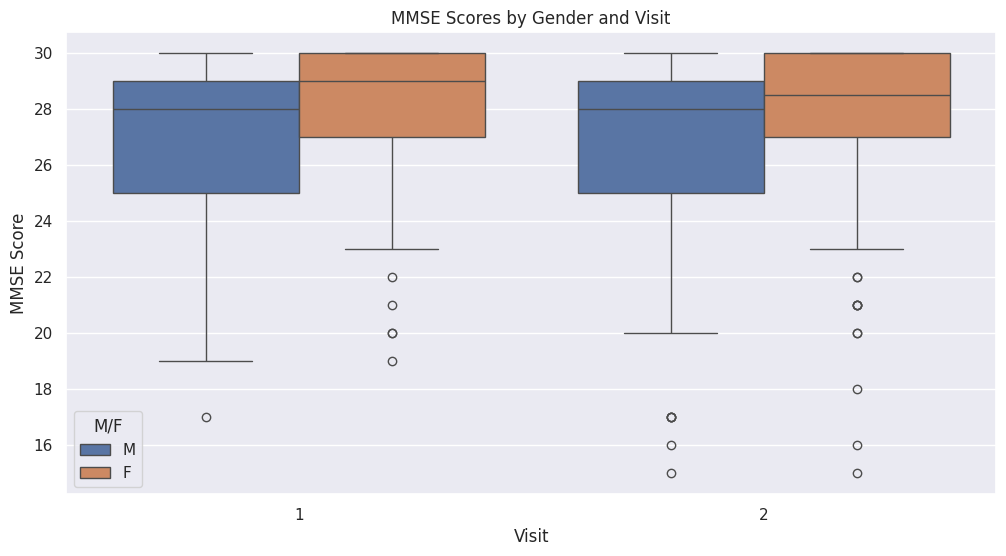

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Visit', y='MMSE', hue='M/F', data=data)
plt.title('MMSE Scores by Gender and Visit')
plt.xlabel('Visit')
plt.ylabel('MMSE Score')
plt.show()

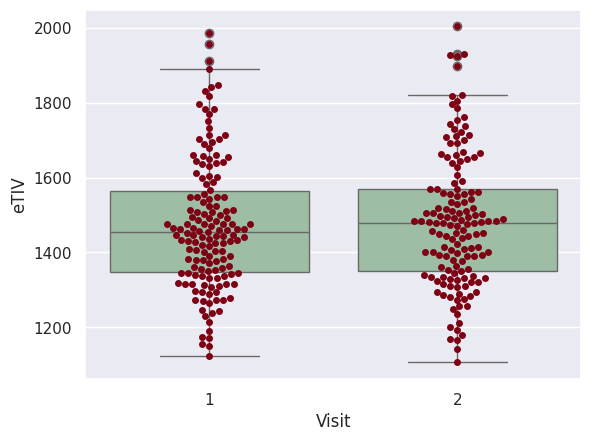

In [ ]:
ax = sns.boxplot(x='Visit', y='eTIV', data=data, color='#99c2a2')
ax = sns.swarmplot(x="Visit", y="eTIV", data=data, color='#7d0013')
plt.show()

Step 2: Research question 1: What is the impact of gender (M/F) and visit time points (Visit) on cognitive function, as measured by MMSE scores, while considering the interaction between gender and visit time points?

<ipython-input-30-77376ab4dea5>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=data, x='Visit', y='MMSE', hue='M/F', dodge=True, markers=['o', 's'],


<Axes: xlabel='Visit', ylabel='MMSE'>

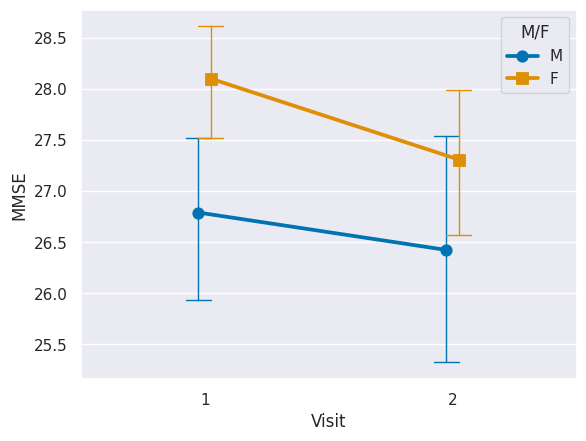

In [ ]:
sns.set()
sns.pointplot(data=data, x='Visit', y='MMSE', hue='M/F', dodge=True, markers=['o', 's'],
	      capsize=.1, errwidth=1, palette='colorblind')


In [ ]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='MMSE', within='Visit', between='M/F', subject='Subject ID', data=data)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source           SS    DF1    DF2      MS      F    p-unc    np2      eps
-----------  ------  -----  -----  ------  -----  -------  -----  -------
M/F          88.689      1    141  88.689  4.321    0.039  0.030  nan
Visit        22.378      1    141  22.378  8.610    0.004  0.058    1.000
Interaction   4.173      1    141   4.173  1.606    0.207  0.011  nan



In [ ]:
posthocs = pg.pairwise_ttests(dv='MMSE', within='Visit', between='M/F',
                              subject='Subject ID', data=data)
pg.print_table(posthocs)



POST HOC TESTS

Contrast     Visit    A    B    Paired    Parametric        T      dof  alternative      p-unc    BF10    hedges
-----------  -------  ---  ---  --------  ------------  -----  -------  -------------  -------  ------  --------
Visit        -        1    2    True      True          2.928  142.000  two-sided        0.004   5.530     0.162
M/F          -        F    M    False     True          1.990  104.517  two-sided        0.049   1.098     0.351
Visit * M/F  1        F    M    False     True          2.633  104.908  two-sided        0.010   4.138     0.464
Visit * M/F  2        F    M    False     True          1.319  106.117  two-sided        0.190   0.402     0.232



/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [ ]:
# Check normality of residuals
residuals_normality = pg.normality(data=data, dv='MMSE', group='Visit', method='shapiro')
print("Normality of Residuals:")
print(residuals_normality)

Normality of Residuals:
              W          pval  normal
Visit                                
1      0.787462  1.761304e-13   False
2      0.760728  5.430693e-14   False


In [ ]:
# Check homogeneity of variances
variances_homogeneity = pg.homoscedasticity(data=data, dv='MMSE', group='Visit')
print("\nHomogeneity of Variances:")
print(variances_homogeneity)


Homogeneity of Variances:
         W  pval  equal_var
levene NaN   NaN      False


Step 3: Research question 2: whether there is a significant difference in brain volume (eTIV) across multiple visits for each patient

<ipython-input-63-93e2bfa8d5e9>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=data, x='Visit', y='eTIV', ci=None, markers='o', linestyles='-', color='b')


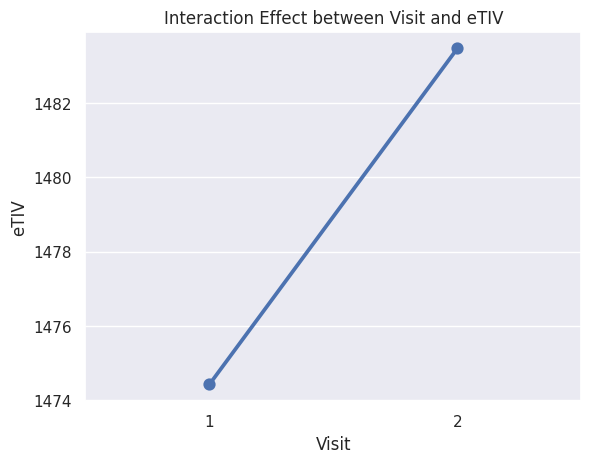

In [ ]:
sns.pointplot(data=data, x='Visit', y='eTIV', ci=None, markers='o', linestyles='-', color='b')
plt.title('Interaction Effect between Visit and eTIV')
plt.xlabel('Visit')
plt.ylabel('eTIV')
plt.show()

In [ ]:
res = pg.rm_anova(dv='eTIV', within='Visit', subject='Subject ID', data=data, detailed=True)
res

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Visit,5573.920139,1,5573.920139,9.246696,0.002807,0.000619,1.0
1,Error,86200.579861,143,602.801258,NaN,NaN,NaN,NaN


In [ ]:
# Perform repeated measures ANOVA
res_education_brain_volume = pg.rm_anova(dv='eTIV', within='Visit', subject='Subject ID', data=data)
print("Results for Impact of Education Level on Brain Volume:")
print(res_education_brain_volume)

Results for Impact of Education Level on Brain Volume:
  Source  ddof1  ddof2         F     p-unc       ng2  eps
0  Visit      1    143  9.246696  0.002807  0.000619  1.0


In [ ]:
#post hoc tests: paired t-tests with FDR-BH corrections
post_hocs = pg.pairwise_ttests(dv='eTIV', within='Visit', subject='Subject ID', padjust='fdr_bh', data=data)
post_hocs

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Visit,1,2,True,True,-3.040838,143.0,two-sided,0.002807,7.532,-0.049472


In [ ]:
#checking assumptions
#mauchly's test of spericity
pg.sphericity(data=data, dv='eTIV', subject='Subject ID', within='Visit')[-1]

1.0

In [ ]:
#test of normality
pg.normality(data=data, dv='eTIV', group='Visit')

,W,pval,normal
Visit,,,
1,0.969209,0.001908,False
2,0.977016,0.015926,False


Step 4: power analysis

In [ ]:
# Statistical Power Analysis for t-tests
effect_size = 0.7
alpha = 0.05
power = 0.91

# Perform power analysis to find sample size
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)
print(f"\nRequired sample size: {sample_size:.2f}")


Required sample size: 45.45


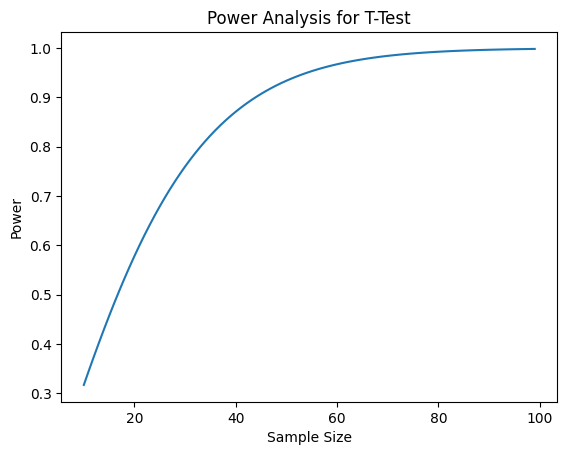

In [ ]:
# Plot power analysis
sample_sizes = np.arange(10, 100)
powers = power_analysis.power(effect_size=effect_size, nobs1=sample_sizes, alpha=alpha)
plt.plot(sample_sizes, powers)
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.title('Power Analysis for T-Test')
plt.show()